### Importing Required Libaries

In [1]:


import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

### Importing Data set

In [2]:


df = pd.read_csv("kaggle_diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


### Get the information of the dataset

In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


#### info
1) According to the above table there is no any null values
2) Consist with 2000 rows and 9 columns

### Checking Duplicates


In [8]:

df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
483,0,84,82,31,125,38.2,0.233,23,0
484,0,145,0,0,0,44.2,0.630,31,1
485,0,135,68,42,250,42.3,0.365,24,1
486,1,139,62,41,480,40.7,0.536,21,0
487,0,173,78,32,265,46.5,1.159,58,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


### info

* Data set consist with 1256 duplicated rows
* Data set consist with 744 non duplicated rows

In [13]:
df1 = df[df.duplicated()]
df1.shape

(1256, 9)

### Get the selected Columns 0 value contain count using df

In [29]:
# Required columns
required_columns = ['BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

# Count the occurrences of 0 in each required column
zero_counts = {col: (df[col] == 0).sum() for col in required_columns}

# Display the result
print(zero_counts)

{'BloodPressure': 34, 'SkinThickness': 215, 'Insulin': 359, 'BMI': 10, 'DiabetesPedigreeFunction': 0, 'Age': 0}


In [14]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
483,0,84,82,31,125,38.2,0.233,23,0
484,0,145,0,0,0,44.2,0.630,31,1
485,0,135,68,42,250,42.3,0.365,24,1
486,1,139,62,41,480,40.7,0.536,21,0
487,0,173,78,32,265,46.5,1.159,58,0


### Get the average value of Selected  Column which is used for Replacing the Null Values with it's Mean using df

In [78]:
# Required columns
required_columns = ['Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Calculate the average value for each column excluding rows with 0
avg_values = {col: df[df[col] != 0][col].mean() for col in required_columns}

# Display the result
print(avg_values)


{'Glucose': 121.7104194857916, 'BloodPressure': 72.26197183098594, 'SkinThickness': 29.406427221172116, 'Insulin': 153.6987012987027, 'BMI': 32.66880108991824}


### Replacing Null Values with it's mean value for the selected columns of df1

In [79]:
for col in required_columns:
    df[col] = df[col].replace(0, avg_values[col])

### Drop Duplicated Values from df Dara Frame

In [80]:
df.drop_duplicates(inplace=True)

### Get the summary statistics of the df Data Frame

In [81]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,3.752688,121.710419,72.261972,29.406427,153.698701,32.668801,0.472355,33.142473,0.340054
std,3.335541,30.353681,12.047197,9.389122,81.120875,7.291959,0.326181,11.751286,0.474046
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,25.000000,121.500000,27.600000,0.244000,24.000000,0.000000
50%,3.000000,117.500000,72.000000,29.406427,153.698701,32.400000,0.375500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,153.698701,36.800000,0.632500,40.250000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


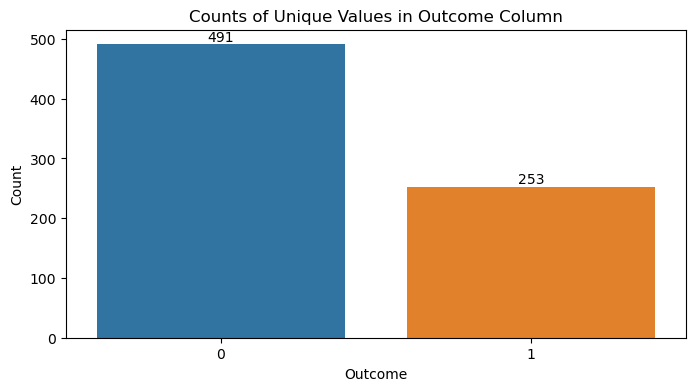

In [82]:
outcome_counts =df['Outcome'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values)

# Customize the plot
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Counts of Unique Values in Outcome Column')
# Annotate each bar with its count
for index, value in enumerate(outcome_counts.values):
    plt.text(index, value + 0.05, str(value), ha='center', va='bottom')
plt.show()

### Balancing Implanced of the target variable [outcome] using SMOTE

In [83]:


from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('Outcome', axis=1), df['Outcome'])
df1 = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [84]:
### Check it applied
df1["Outcome"].value_counts()

1    491
0    491
Name: Outcome, dtype: int64

### Removing Traget Variables to the EDA Analysis

In [86]:
columns = df1.columns
columnse = columns.delete(0)
columnse

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

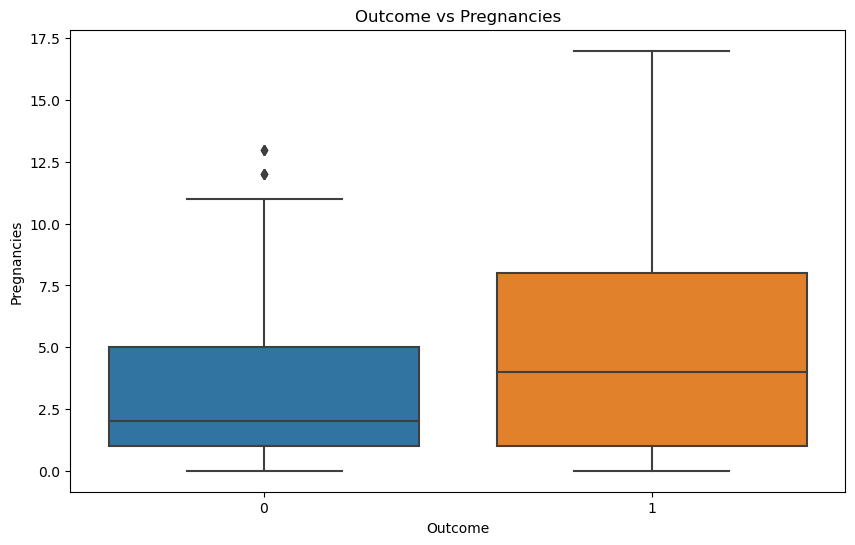

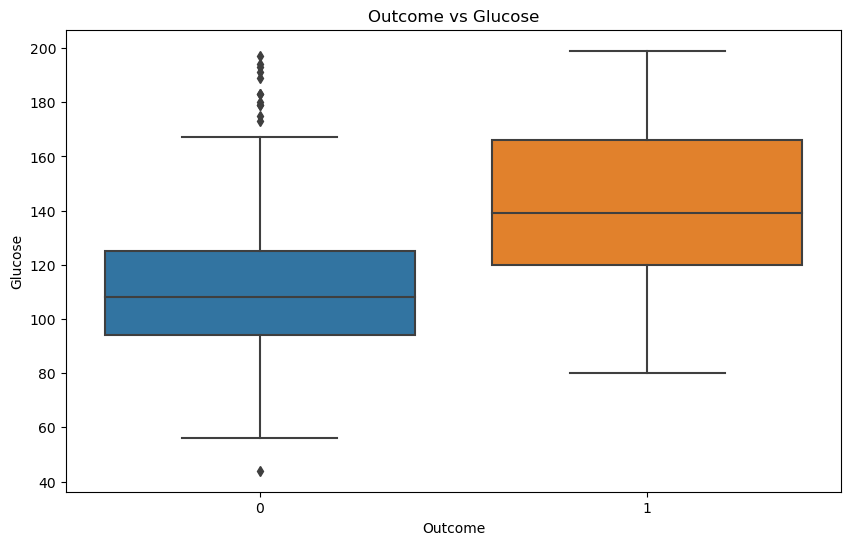

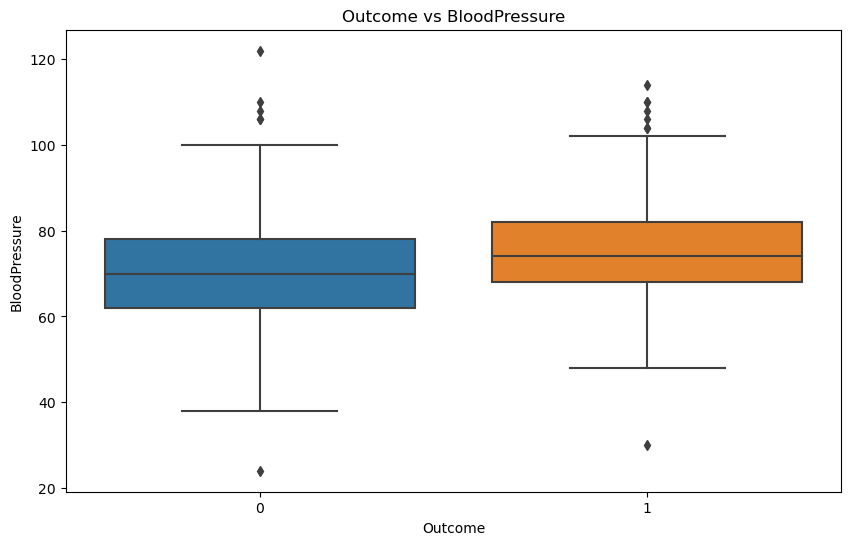

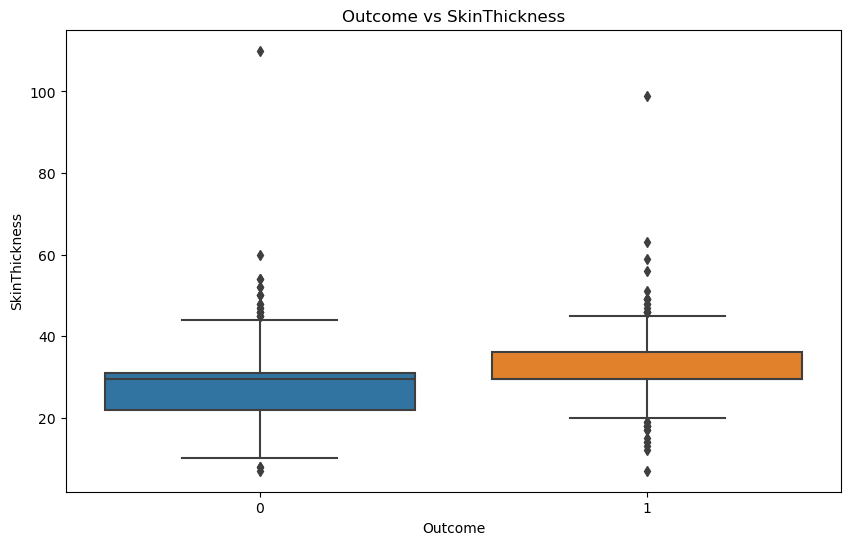

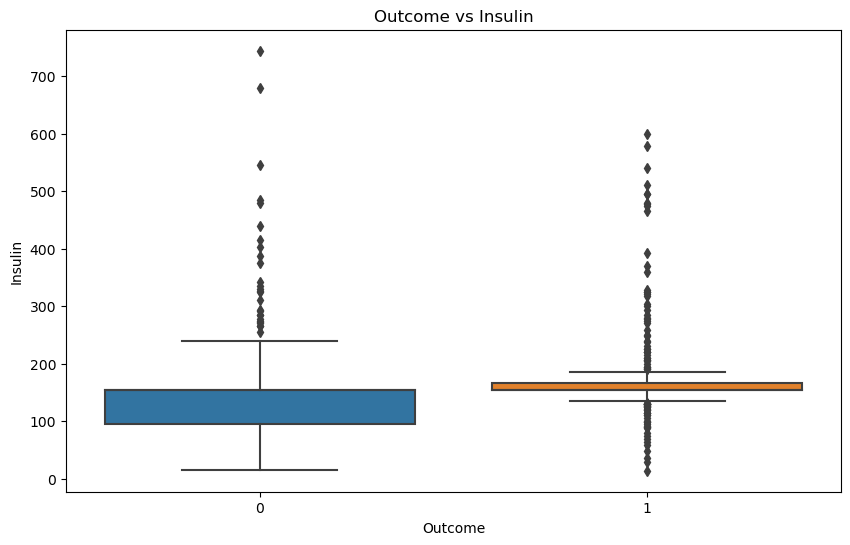

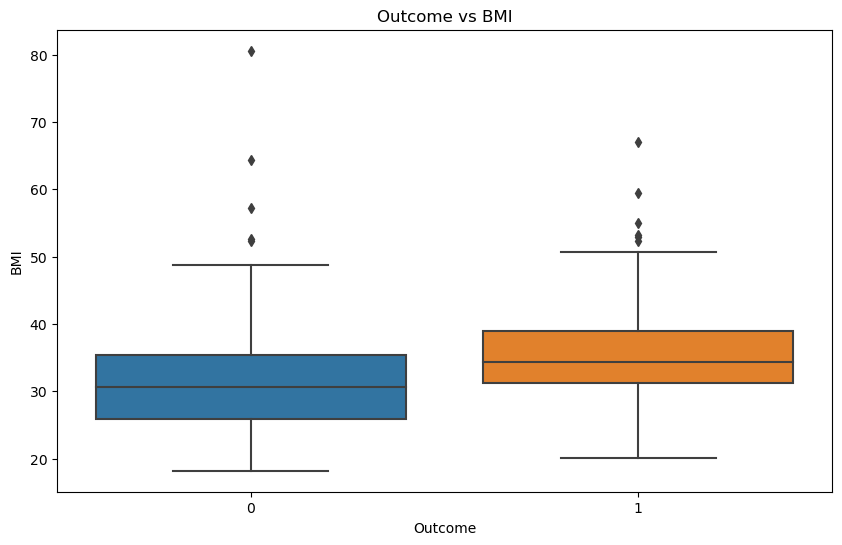

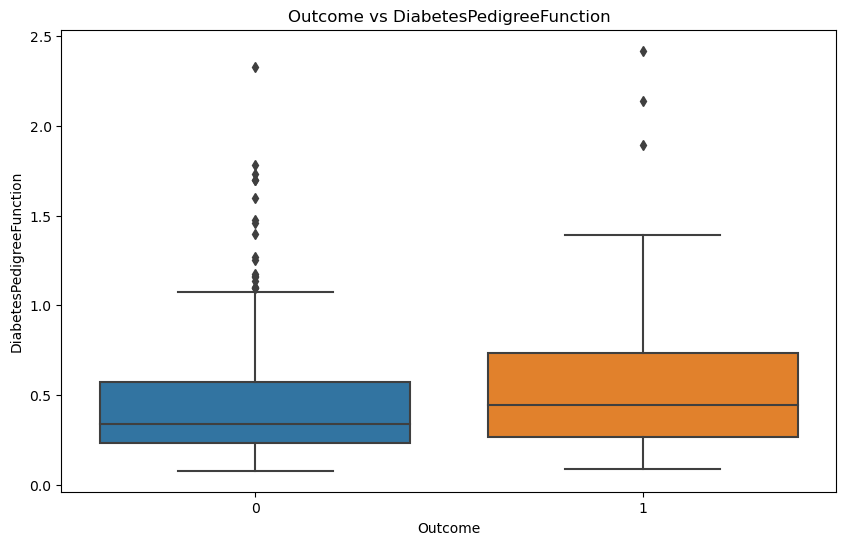

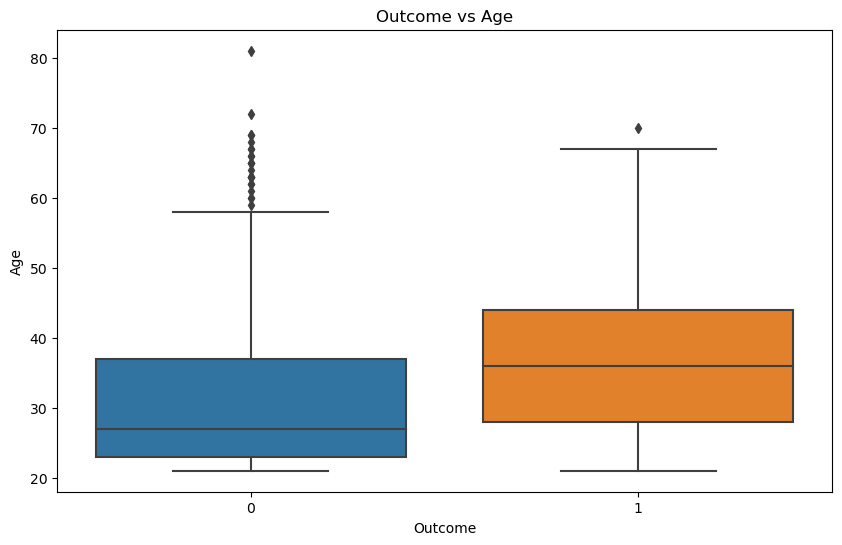

In [87]:
for col in columnse:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="Outcome", y=col, data=df)
    plt.title(f'Outcome vs {col}')
    plt.show()

In [15]:
df1.columns

Index(['Outcome', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [75]:
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [76]:
### Removing Outliers

from scipy import stats
import numpy as np

def remove_outliers_zscore(dataframe, column, threshold=3):
    z_scores = np.abs(stats.zscore(dataframe[column]))
    return dataframe[(z_scores < threshold)]

# Apply to each numerical column
for column in columns:
    df2 = remove_outliers_zscore(df1, column)

print(df2.describe())


          Outcome  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  979.000000   979.000000  979.000000     979.000000     979.000000   
mean     0.500511     3.881512  126.168539      72.979202      29.972818   
std      0.500255     3.253479   32.505359      11.698937       8.730461   
min      0.000000     0.000000    0.000000      24.000000       7.000000   
25%      0.000000     1.000000  103.000000      65.404160      27.000000   
50%      1.000000     3.000000  122.000000      72.261972      29.406427   
75%      1.000000     6.000000  149.000000      80.000000      33.000000   
max      1.000000    17.000000  199.000000     122.000000     110.000000   

          Insulin         BMI  DiabetesPedigreeFunction         Age  
count  979.000000  979.000000                979.000000  979.000000  
mean   160.585043   33.233125                  0.487846   34.139939  
std     82.671298    6.849469                  0.320609   11.411786  
min     14.000000   18.200000      

In [90]:
from sklearn.model_selection import train_test_split
X= df2.drop(columns="Outcome",axis=1)
Y= df2["Outcome"]
x_train,x_test,y_train,y_test= train_test_split(X,Y,train_size=0.75,random_state=24,shuffle=True)

In [91]:
print(f'X_train shape {x_train.shape}') 
print(f'X_test shape {x_test.shape}')
print(f'Y_train shape {y_train.shape}')
print(f'Y_test shape {y_test.shape}')

X_train shape (734, 8)
X_test shape (245, 8)
Y_train shape (734,)
Y_test shape (245,)


In [92]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}




# Perform cross-validation and evaluate each model

In [93]:

for name, model in models.items():
    scores = cross_val_score(model, X, Y, cv=5)  # 5-fold cross-validation
    print(f"Model: {name}")
    print(f"Cross-validated Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")
    print("-" * 60)

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Model: Logistic Regression
Cross-validated Accuracy: 0.72 (+/- 0.07)
------------------------------------------------------------
Model: Decision Tree
Cross-validated Accuracy: 0.76 (+/- 0.07)
------------------------------------------------------------
Model: Random Forest
Cross-validated Accuracy: 0.82 (+/- 0.10)
------------------------------------------------------------
Model: Support Vector Machine
Cross-validated Accuracy: 0.74 (+/- 0.03)
------------------------------------------------------------
Model: k-Nearest Neighbors
Cross-validated Accuracy: 0.75 (+/- 0.10)
------------------------------------------------------------


Then I choosen best model for the taken data set is Random Forest Classifier

In [94]:

# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)  # Train the model
    y_pred = model.predict(x_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    report = classification_report(y_test, y_pred)  # Get classification report
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)
    print("-" * 60)

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.74       112
           1       0.79      0.73      0.76       133

    accuracy                           0.75       245
   macro avg       0.75      0.75      0.75       245
weighted avg       0.75      0.75      0.75       245

------------------------------------------------------------
Model: Decision Tree
Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.77      0.75       112
           1       0.80      0.77      0.78       133

    accuracy                           0.77       245
   macro avg       0.77      0.77      0.77       245
weighted avg       0.77      0.77      0.77       245

------------------------------------------------------------
Model: Random Forest
Accuracy: 0.83
Classification Report:
               precision    recall  f1-

### Hyper Parameter Tuning

In [95]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy']
}



# Initialize GridSearchCV
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Best estimator
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100}
Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       112
           1       0.84      0.84      0.84       133

    accuracy                           0.82       245
   macro avg       0.82      0.82      0.82       245
weighted avg       0.82      0.82      0.82       245



### Final Best Model after Hyper Parameter Tuning

In [96]:
rfc = RandomForestClassifier()
final_model = best_rf.fit(x_train,y_train) 
y_pred = final_model.predict(x_test)  # Predict on the test set
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
report = classification_report(y_test, y_pred)  # Get classification report
print(f"Model: RandomForestClassifier")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
print("-" * 60)   


Model: RandomForestClassifier
Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       112
           1       0.86      0.84      0.85       133

    accuracy                           0.84       245
   macro avg       0.84      0.84      0.84       245
weighted avg       0.84      0.84      0.84       245

------------------------------------------------------------


### Get the Prediction for the new Data ponits

In [105]:
pr= 3
gl= 100
bl= 70
sk= 32
ins= 165
bm= 30
df= 0.5
age= 40

new_data = {
    'Pregnancies': [pr],
    'Glucose': [gl],
    'BloodPressure': [bl],
    'SkinThickness': [sk],
    'Insulin': [ins],
    'BMI': [bm],
    'DiabetesPedigreeFunction': [df],
    'Age': [age],
}

In [106]:
# Create DataFrame for new values
new_df = pd.DataFrame(new_data)
feature_cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

In [108]:

X_new = new_df[feature_cols]
y_pred_new1 = final_model.predict(X_new)


if y_pred_new1 == 0:
    print("Luckily Patient has not Diabetes")
else:
    print("Unfortunately Patient has Diabetes")


Unfortunately Patient has Diabetes


In [109]:
import pickle
with open('predictor.pickle', 'wb') as file:
    pickle.dump(final_model, file)